# Generate histogram of releases
Code Author: Sahar El Abbadi
Date started: 2023-03-14
Date last edited: 2023-03-14

Notebook objective: to generate a histogram of Stanford releases, categorizing release by type:
- True Positive
- True Negative
- False Negative
- False Positive
- Missing data - overpass recorded in field but not as an overpass by the team
- Stanford Filtered
- Operator Filtered

## Evaluate data that passes all QC filters

Select overpasses that pass both Stanford and Operator QC criteria. Generate dataframes for true positive, false positive, true negative, and false negative

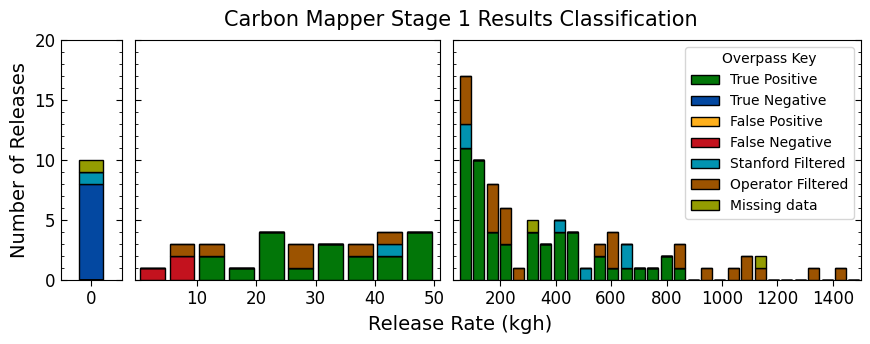

In [63]:
# Make plot of true negatives
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import datetime
import pathlib, math
from methods_source import  classify_histogram_data
import numpy as np

############## Setup Data ##############
operator='Carbon Mapper'
stage=1
strict_discard=False
# Create bins for plot
threshold_lower = 0
threshold_upper = 50
n_bins = 10

cm_histogram_low = classify_histogram_data(operator, stage, strict_discard, threshold_lower, threshold_upper, n_bins)
threshold_lower = 50
threshold_upper = 1500
n_bins = 30
cm_histogram_high = classify_histogram_data(operator, stage, strict_discard, threshold_lower, threshold_upper, n_bins)

############## Figure ##############
fig, [ax1, ax2, ax3] = plt.subplots(1,3,
                                    figsize=(10, 3),
                                    gridspec_kw={'width_ratios': [0.6, 3, 4]})

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.05)
# How high do I need to set my axes? Look at max value for data that will make each histogram
low_height = cm_histogram_low.bin_height.max()
high_height = cm_histogram_high.bin_height.max()
y_height = max(low_height, high_height)
y_height = math.ceil(y_height / 5) * 5

# Ram's colors:
seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#           0sangre,    1neptune,  2pumpkin,  3clover,  4denim,     5cocoa,     6cumin  7berry

# Color scheme
tp_color = seshadri[3]
tn_color = seshadri[1]
fp_color = seshadri[2]
fn_color = seshadri[0]
su_color = seshadri[4]
op_color = seshadri[5]
missing_color = seshadri[6]

# # Color scheme - ColorBrewer2
# tp_color = '#66c2a5'
# tn_color = '#a6d854'
# fp_color = '#fc8d62'
# fn_color = '#8da0cb'
# su_color = '#e78ac3'
# op_color = '#ffd92f'
# missing_color = '#b3b3b3'

barWidth = 0.2
# add true negatives
ax1.bar(0, cm_histogram_low.true_negative, width = barWidth, edgecolor='black', color=tn_color)

# Zero release discarded by SU
su_filter_height0 = cm_histogram_low.true_negative
ax1.bar(0, cm_histogram_low.zero_filter_su, bottom=su_filter_height0, width=barWidth, label='Stanford Filtered', edgecolor='black', color=su_color)

# Zero release discarded by operator
op_filter_height0 = np.add(su_filter_height0, cm_histogram_low.zero_filter_su).tolist()
ax1.bar(0, cm_histogram_low.zero_filter_op, bottom=op_filter_height0, width=barWidth, label='Operator Filtered', edgecolor='black', color=op_color)
#
# Missing data zero release
missing_height = np.add(op_filter_height0, cm_histogram_low.zero_filter_op).tolist()
ax1.bar(0, cm_histogram_low.zero_missing, bottom=op_filter_height0, width=barWidth, label='Operator Filtered', edgecolor='black', color=missing_color)

####### Middle histogram
barWidth = 4.2
# Middle plot
# Add True Positives
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.true_positive, width=barWidth,
        label='True positive', edgecolor='black', color=tp_color)

# Add False Positives
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.false_positive, bottom=cm_histogram_low.true_positive, width=barWidth, label='False positive', edgecolor='black', color=fp_color)

# Add False Negatives
fn_height = np.add(cm_histogram_low.true_positive, cm_histogram_low.false_positive).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.false_negative, bottom=cm_histogram_low.true_positive, width=barWidth, label = 'False Negative', edgecolor='black', color=fn_color)

# Add Stanford QC
su_filter_height = np.add(fn_height, cm_histogram_low.false_negative).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.filter_stanford, bottom=su_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=su_color)

# Add Carbon Mapper QC
op_filter_height = np.add(su_filter_height, cm_histogram_low.filter_stanford).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.filter_operator, bottom=op_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=op_color)

# Add missing data
missing_height = np.add(op_filter_height, cm_histogram_low.filter_operator).tolist()
ax2.bar(cm_histogram_low.bin_median, cm_histogram_low.missing_data, bottom=missing_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=missing_color)

####### Right plot #######

# reset bin width
barWidth = 40
# Add True Positives
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.true_positive, width=barWidth, label='True positive', edgecolor='black', color=tp_color)

# Add False Positives
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.false_positive, bottom=cm_histogram_high.true_positive, width=barWidth, label='False positive', edgecolor='black', color=fp_color)

# Add False Negatives
fn_height = np.add(cm_histogram_high.true_positive, cm_histogram_high.false_positive).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.false_negative, bottom=cm_histogram_high.true_positive, width=barWidth, label = 'False Negative', edgecolor='black', color=fn_color)

# Add Stanford QC
su_filter_height = np.add(fn_height, cm_histogram_high.false_negative).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.filter_stanford, bottom=su_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=su_color)

# Add Carbon Mapper QC
op_filter_height = np.add(su_filter_height, cm_histogram_high.filter_stanford).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.filter_operator, bottom=op_filter_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=op_color)

# Add missing data
missing_height = np.add(op_filter_height, cm_histogram_high.filter_operator).tolist()
ax3.bar(cm_histogram_high.bin_median, cm_histogram_high.missing_data, bottom=missing_height, width=barWidth, label='Stanford Filtered', edgecolor='black', color=missing_color)

############ Plot formatting ############
# Set height of x and y axis limits
# Left plot only shows zero
ax1.set_ylim(bottom=0, top=y_height)
ax1.set_xlim([-0.25, 0.25])

# Middle plot shows >0 to 50 kgh
ax2.set_ylim(bottom=0, top=y_height)
ax2.set_xlim(left=-0.5, right=51)

# Right plot shows 50 to 1500
ax3.set_ylim(bottom=0, top=y_height)
ax3.set_xlim(left=30, right=1500)

# Common label for x-axis on all suplots
txt_x_label = fig.text(0.5, -0.08, 'Release Rate (kgh)', ha='center', va='bottom', fontsize=14)
txt_title = fig.text(0.5, 1, 'Carbon Mapper Stage 1 Results Classification', ha='center', va='top', fontsize=15)

# Axes formatting and labels
ax1.set_xticks([0]) # only have a tick at 0
ax1.set_ylabel('Number of Releases', fontsize=14)
ax1.tick_params(labelsize=12)
ax1.minorticks_on()
ax1.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True) # only label left & bottom axis
ax1.tick_params(direction='in', which='major', axis='y', length=4, left=True, right=True) # y-axis major
ax1.tick_params(direction='in', which='minor', length=2, left=True, right=True) # y-axis minor
ax1.tick_params(direction='out', axis='x', which='major', length=4, bottom=True, top=False) # x-axis major

# Format axes on middle plot
ax2.tick_params(labelsize=12)
ax2.minorticks_on()
ax2.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False) # only label bottom axis
ax2.tick_params(direction='in', which='major', axis='y', length=4, left=True, right=True) # y-axis major
ax2.tick_params(direction='in', which='minor', length=2, left=True, right=True) # y-axis minor
ax2.tick_params(direction='out', axis='x', which='major', length=4, bottom=True, top=False) # x-axis major
ax2.tick_params(which='minor', axis='x', bottom=False, top=False)
x_ticks = ax2.xaxis.get_major_ticks()
x_ticks[1].label1.set_visible(False) # remove label on x=0
x_ticks[1].set_visible(False)

# Format axes on right plot
ax3.tick_params(labelsize=12)
ax3.minorticks_on()
ax3.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False) # only label on bottom
ax3.tick_params(axis='y', which='major', direction='in', length=4, left=True, right=True) # y-axis major
ax3.tick_params(axis='y', which='minor', direction='in', length=2, left=True, right=True) # y-axis minor
ax3.tick_params(direction='out', axis='x', which='major', length=4, bottom=True, top=False) # x-axis major
ax3.tick_params(which='minor', axis='x', bottom=False, top=False)

# Set axes and background color to white
ax1.set_facecolor('white')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')

# Add legend

histogram_legend = {
    'True Positive': tp_color,
    'True Negative': tn_color,
    'False Positive': fp_color,
    'False Negative': fn_color,
    'Stanford Filtered': su_color,
    'Operator Filtered': op_color,
    'Missing data': missing_color,
}

legend_elements = [Patch(facecolor=v, edgecolor='black', label=k) for k, v in histogram_legend.items()]
# lgd = ax3.legend(title='Overpass Key', handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
lgd = ax3.legend(title='Overpass Key', handles=legend_elements, loc='upper right')

# Save figure
now = datetime.datetime.now()
save_time = now.strftime("%Y%m%d")
fig_name = f'histogram_chart_CM_testcode'
fig_path = pathlib.PurePath('04_figures', fig_name)
plt.savefig(fig_path, bbox_extra_artists=(txt_x_label,), bbox_inches='tight')